# Answring questions 

1- What is another preferred name of data mining?

Another preferred name is Knowledge discovery from databases (KDD).

                                              -----------------------------


2- Why Data Mining is a misnomer?

It's considered minsomer because we are not search for data itself because we already have it but it's dedicated to extract a knowldege and patterens from a huge amount of data.

                                              -----------------------------

3- What is the general knowledge discovery process?

it's the process that if we follow its steps we will discover meaningful knowledge and patterns from huge data, and emphasizes the "high-level" application of particular data mining methods.
And its steps are:

Determine the domain.

Understanding the problem.

Get the task-relevant data from the data warehouse or databases.

Understanding the data.

Cleaning the data (remove noise, null values, duplicates, convert their features to the proper data type).

Choosing the data mining goal (classification, regression, clustring) and select the best model to reach this goal. (choose best hyperparameters, etc...)

Data mining

Pattern evaluation

                                             -----------------------------

4- What is the difference between a data engineer and data scientist/AI engineer?

They have common things when it comes to skills and mindset but the main difference between data engineer and data scientist is that the data engineer is someone who is responsible for handling and storing data into databases and large-scale processing systems also develops, constructs, tests and maintains architectures and delivering task-relevant data from source to its required destination, on the other hand, the data scientist is responsible for clean and organize and interpret the non-meaningful data using some mathematical and statistical methods also extract knowledge and gain insights from it using some business solutions models. wherease AI engineers perform include designing neural networks, performing computational analysis, creating mathematical models and implementing algorithms that help machines learn how to do specific tasks and also depoly the final model into real bussiness application or API.

                                              -----------------------------

5- In data mining, what is the difference between prediction and categorization?

the main difference between prediction and categorization is that categorization (classification) is to determine the (categorical) labels (discrete value) of objects whose class label is unknown or classify these observations into their right categories like the type of fruit, on the other hand, prediction (regression) about predicts the unknown numerical value (continuous value) like predicting the price of a new house and it's mostly used to predict the value of something in the future.

                                              -----------------------------
                                              
6- Why data science/machine learning is a bad idea in the context of information security?

because data science is a data-driven approach so it depends on the data to work and that may be increased risk of data breach and fine and by that you may build a bad model, or may be fed a wrong informaiton to your model, also you have to make sure that you're folllow data privacy guidlines.

                                              -----------------------------
                                              
7- What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

The CIA triad is a concept for guiding information security policy within an organization and it named like that because it consists of three important key terms confidentiality (is a set of rules that restricts information access), integrity (make sure that the information in the organization is accurate and reliable), availability(is a guarantee that only authorized people will have dependable access to information). and we can use it in our AI pipelines to ensure that AI pipeline follow CIA guidlines or to check what is the type of attaks that we are under and fix the situation quickly.
types of attacks:

Adversarial (front-end) - Confidentiality

Backdoor/data poisoning (data source) – Integrity

Training data reconstruction – Confidentiality (privacy)

Steeling the model - Confidentiality

Membership inference - Confidentiality (privacy)


# Problem formulation:
here we have a dataset from Kaggle which was originally scraped from Wish E-Commerce Platform. It contains some input features like (price, retail_price, product_size, product_colour) and the output here is rating. so our job here to build the model to make us able to answering some quesitons like.

-What are the top selling products?

-Which are the most important features that help us predicting whether the product will succuess or nor?sold?

-what's the expected rating of product before listing it out into the site?

The first challenge here is that the data is not clean and we need a lot of preprocessing on it.

The second challenge here is that the data is imblanced data set (we have a lot 4 rating and only 11 rating of 2).

The impact of solving this problem that is you can make an educated guess about how likely people are to like your product without actually putting it on the market. In addition, by doing so, we may better determine under what circumstances a product will be highly rated, as well as the wish.com consumer base.

Data mining function

classification & prediction

# Experimental protocol:
first: Data Processing:

It’s a key step in Machine Learning project to ensure that data is transformed ,clean, and easy to use for analytical purpose. Below are some important/key steps:

1.Drop irrelevant and unnecessary features.
2.Check if there is any null values and replace them.
3.Create new features from existing features if needed
4.Clean categorical variables.
second: convert categorical and string columns to numerical columns.

third: start buliding your models and choose the best one.

# import all required packages

In [1]:
# For uploading and accessing the data
import numpy as np
import pandas as pd

# for Data Visualization
import matplotlib.pyplot as plt

# for making statistical graphics.
import seaborn as sns

# for Encode categorical features as a numeric values
from sklearn.preprocessing import LabelEncoder

# for scaling the data
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# for split data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

# for fitting Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
# for calculate accuracy_score, f1_score
from sklearn.metrics import f1_score, accuracy_score, classification_report ,confusion_matrix

In [2]:
# reading the training dataset 
df_train = pd.read_csv('train_new.csv') 
# reading the testing dataset 
df_test = pd.read_csv('test_new.csv') 

In [3]:
#show heading of columns in trainig data
df_train.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [4]:
#show heading of columns in testing data
df_test.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [5]:
# show the training data shape
print('Shape to traing : ', df_train.shape)
# show the testing data shape
print('Shape to testing : ', df_test.shape)

Shape to traing :  (1094, 34)
Shape to testing :  (479, 33)


In [6]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [7]:
# show sum of Null values in training data 
print('check Null values in training data  : \n', df_train.isnull().sum(), ' \n')
# show sum of Null values in testing data 
print('check Null values in testing data  : \n', df_test.isnull().sum())

check Null values in training data  : 
 price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count   

In [8]:
# show the sum of null values in rating 
df_train.rating.isnull().sum()

0

In [9]:
# show the unique value to rating 
df_train.rating.value_counts()

4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: rating, dtype: int64

he rating data

No found Null value
It has noise value Because the rating values from 1 to 5, but here it has 6
so i will handle it by drop this row

Handling the Lable(rating Columns)


In [10]:
# Drop row with the rating value is 6
df_train = df_train[df_train.rating != 6.0]
df_train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [11]:
total_train = df_train.isnull().sum().sort_values(ascending=False)
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)

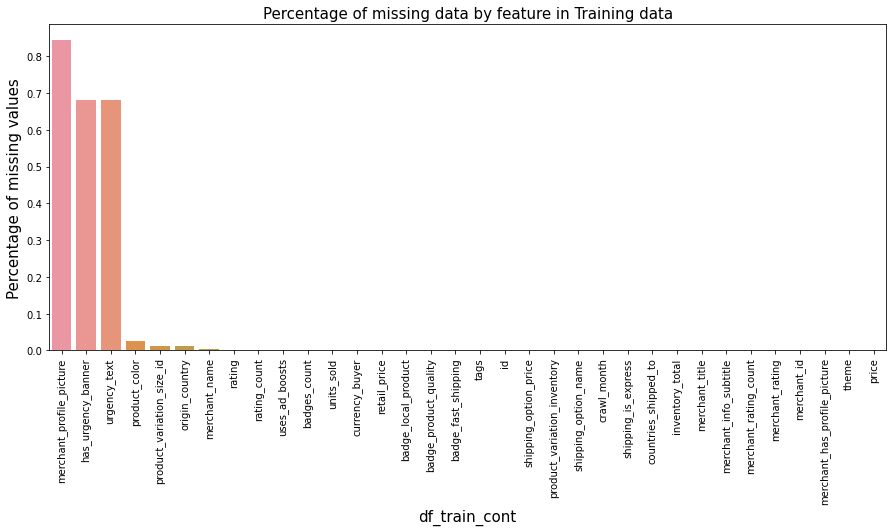

In [12]:
# Show the total missing values and Percentage in Training data 
missing_data = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_train_cont', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage of missing data by feature in Training data', fontsize=15)
plt.show()

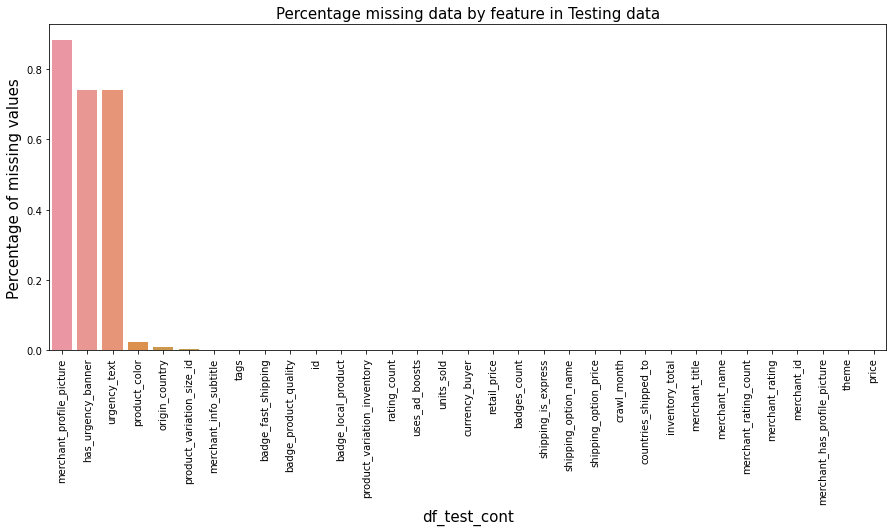

In [13]:
# Show the total missing values and Percent in Testing data 
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_test_cont', fontsize=15)
plt.ylabel('Percentage of missing values', fontsize=15)
plt.title('Percentage missing data by feature in Testing data', fontsize=15)
plt.show()

In [14]:
# Show The unique value in 'product_color' in training data
df_train.product_color.unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [15]:
# Show The unique value in the train data
df_train.nunique()

price                            116
retail_price                      95
currency_buyer                     1
units_sold                        13
uses_ad_boosts                     2
rating                             5
rating_count                     584
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                             894
product_color                     86
product_variation_size_id         83
product_variation_inventory       47
shipping_option_name              13
shipping_option_price              7
shipping_is_express                2
countries_shipped_to              83
inventory_total                    5
has_urgency_banner                 1
urgency_text                       2
origin_country                     5
merchant_title                   746
merchant_name                    745
merchant_info_subtitle           807
merchant_rating_count            717
m

In [16]:
#drop columns with most null values or only one value 
df_train= df_train.drop(['currency_buyer','has_urgency_banner','theme','crawl_month','merchant_profile_picture','merchant_info_subtitle','tags','merchant_name','urgency_text','id'], axis=1)

In [17]:
df_test= df_test.drop(['currency_buyer','has_urgency_banner','theme','crawl_month','merchant_profile_picture','merchant_info_subtitle','tags','merchant_name','urgency_text'], axis=1)

In [18]:
df_train['product_color'] = df_train['product_color'].fillna('another_color')
df_test['product_color'] = df_test['product_color'].fillna('another_color')

In [19]:
df_test.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       2
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  5
merchant_title                  0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
merchant_has_profile_picture    0
id                              0
dtype: int64

In [20]:
df_train['origin_country'] = df_train['origin_country'].fillna('other')
df_test['origin_country'] = df_test['origin_country'].fillna('other')

In [21]:
df_train['product_variation_size_id'] = df_train['product_variation_size_id'].fillna('another_size')
df_test['product_variation_size_id'] = df_test['product_variation_size_id'].fillna('anther_size')

In [22]:
df_train.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
merchant_has_profile_picture    0
dtype: int64

In [23]:
# Function to Substitute the new substring for all instances of the old substring when replacing the "product_variation_size_id".

def variation_size(df): 
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['XXXS'], value = '3XS')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['XXS','Size-XXS','SIZE XXS','Size -XXS','Size XXS','SIZE-XXS'], value = '2XS')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['XS.','Size-XS', 'SIZE XS'], value = 'XS')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['S.','S(bust 88cm)','s','Size--S','Size S','Size-S','S/M(child)','S Diameter 30cm','S (waist58-62cm)','S Pink','US-S',
                                  'pants-S','Size S.','S..','25-S','size S','S(Pink & Black)','Size/S','Suit-S','SIZE S'], value = 'S')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['Size M','M.'], value = 'M')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['SizeL','L.','Size-L','32/L'], value = 'L')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['X   L', '1 PC - XL'], value = 'XL')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['XXL'], value = '2XL')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['04-3XL','XXXL'], value = '3XL')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['XXXXL','SIZE-4XL','Size4XL'], value = '4XL')
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['XXXXXL', 'Size-5XL','5XL'], value = '5XL' )
    df.product_variation_size_id = df.product_variation_size_id.replace(to_replace= ['10 ml', 'Base Coat', '1', '25', '40 cm', '10pcs', 'H01', '60', 'daughter 24M', '4', '1 pc.', '80 X 200 CM', 'EU 35', '34', '100pcs', 'first  generation',
                                '2pcs', 'Women Size 37', 'AU plug Low quality', 'One Size', '26(Waist 72cm 28inch)', '29', '35', '4-5 Years', '5PAIRS', 'Pack of 1', '100 x 100cm(39.3 x 39.3inch)', '100 cm', 'Round', '2', '5', '30 cm', '3 layered anklet', '17', 'US 6.5 (EU 37)', 
                                'US5.5-EU35', 'EU39(US8)', 'Women Size 36', '20PCS-10PAIRS', 'B', '20pcs', 'Floating Chair for Kid', '1pc', '5', '36', '33', 'choose a size', 'Base & Top & Matte Top Coat', 'Baby Float Boat', '1m by 3m',
       'White', 'Base Coat'], value = "Others" )
    return df.product_variation_size_id

In [24]:
# Replace The product_variation_size_id value in training data
df_train.product_variation_size_id = variation_size(df_train)

# Replace The product_variation_size_id value in testing data
df_test.product_variation_size_id = variation_size(df_test)

In [25]:
# Function to Substitute the new substring for all instances of the old substring when replacing the product colour.
def replace_color(df):
    df.product_color = df.product_color.replace(to_replace = ['lightyellow', 'gold'], value='yellow')
    df.product_color = df.product_color.replace(to_replace = ['Black', 'coolblack', 'offblack'], value = "black")
    df.product_color = df.product_color.replace(to_replace = ['whitefloral', 'White', 'offwhite', 'ivory'], value = 'white')
    df.product_color = df.product_color.replace(to_replace = ['lakeblue', 'navyblue', 'Blue', 'denimblue', 'lightblue', 'skyblue', 'navy', 'navy blue', 'darkblue', 'prussianblue'], value = 'blue')
    df.product_color = df.product_color.replace(to_replace = ['beige', 'nude'], value = 'apricot')
    df.product_color = df.product_color.replace(to_replace = ['gray', 'lightgrey', 'silver', 'lightgray'], value = 'grey')
    df.product_color = df.product_color.replace(to_replace = ['khaki', 'coffee', 'camel', 'lightkhaki', 'tan'], value = 'brown')
    df.product_color = df.product_color.replace(to_replace = ['winered', 'watermelonred', 'wine', 'rosered', 'rose', 'wine red', 'claret', 'burgundy'], value = 'maroon')
    df.product_color = df.product_color.replace(to_replace = ['RED', 'lightred', 'jasper', 'coralred'], value = 'red')
    df.product_color = df.product_color.replace(to_replace = ['armygreen', 'mintgreen', 'army', 'applegreen', 'camouflage', 'fluorescentgreen', 'lightgreen', 'darkgreen', 'Army green', 'light green', 'army green'], value = 'green')
    df.product_color = df.product_color.replace(to_replace = ['orange-red'], value = 'orange')
    df.product_color = df.product_color.replace(to_replace = ['lightpink', 'floral', 'Pink', 'dustypink', 'rosegold'], value = 'pink')
    df.product_color = df.product_color.replace(to_replace = ['violet', 'lightpurple'], value = 'purple')
    df.product_color = df.product_color.replace(to_replace = ['white & red', 'red & blue', 'greysnakeskinprint', 'orange & camouflage', 'black & stripe', 'leopardprint', 'pink & grey', 'winered & yellow', 'whitestripe', 'blue & pink', 'brown & yellow', 'star', 'rainbow', 'pink & blue', 'black & yellow', 'navyblue & white', 'blackwhite', 'leopard', 'black & blue', 'pink & black', 'gray & white', 'pink & white', 'white & black'], value = 'multicolor')
  
    return df.product_color

In [26]:
# Replace The product_color value in training data
df_train.product_color = replace_color(df_train)

# Replace The product_color value in testing data
df_test.product_color = replace_color(df_test)

In [27]:
df_train.product_color

0              yellow
1               black
2               white
3                blue
4             apricot
            ...      
1089              red
1090    another_color
1091           purple
1092            black
1093           yellow
Name: product_color, Length: 1093, dtype: object

In [28]:
# Drop some columns in training and testing data
df_train = df_train.drop(['merchant_title','merchant_id'], axis=1)
df_test = df_test.drop(['merchant_title','merchant_id'], axis=1)

In [29]:
# for convert the categorical values to numerical values of some features in training and testing data 
from sklearn.preprocessing import LabelEncoder

# Creat Object from LabelEncoder
le = LabelEncoder()

# the features are need to convert the categorical values to numerical values
X_columns = ['product_color', 'product_variation_size_id', 'shipping_option_name', 'origin_country']

for i in X_columns:
    df_train.loc[:,i] = le.fit_transform(df_train.loc[:, i])
    df_test.loc[:,i] = le.fit_transform(df_test.loc[:, i])

In [30]:
# Spliting the traing data to X (the Features) and Y (the Label)
X , Y = df_train[df_train.columns[df_train.columns != 'rating']], df_train[df_train.columns[df_train.columns == 'rating']]

In [31]:
# Split the traing data 80% for train and 20% for test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, shuffle=True, random_state= 65)

In [32]:
# Creat Object from MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# First model: Decision tree with tuning hyperparameters manually.

In [54]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth=7)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred,average='micro')}")

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.80      0.17      0.28        24
         4.0       0.82      0.97      0.89       167
         5.0       0.69      0.44      0.54        25

    accuracy                           0.81       219
   macro avg       0.66      0.52      0.54       219
weighted avg       0.80      0.81      0.77       219

confusion_matrix:[[  1   0   0   0   0]
 [  0   0   0   2   0]
 [  0   0   4  19   1]
 [  0   0   1 162   4]
 [  0   0   0  14  11]]
f1_score=0.8127853881278538


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Second model: Decision tree using grid search to tune hyperparameters

In [34]:
#find the optimal hyperparameters
dtreeparam_grid = {
    'max_depth': np.arange(1,17),
    'max_features': np.arange(1,20),
    'random_state': [0]
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=20)
dtree_search.fit(x_train , y_train)

all_param = []
all_param = list(dtree_search.best_params_.values())

dtree = DecisionTreeClassifier(criterion = "gini", max_depth= all_param[0], max_features =all_param[1], random_state=5)
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred,average='micro')}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 20 folds for each of 304 candidates, totalling 6080 fits
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.33      0.08      0.13        24
         4.0       0.82      0.97      0.89       167
         5.0       0.73      0.32      0.44        25

    accuracy                           0.79       219
   macro avg       0.58      0.47      0.49       219
weighted avg       0.75      0.79      0.75       219

confusion_matrix:[[  1   0   0   0   0]
 [  0   0   0   2   0]
 [  0   2   2  19   1]
 [  0   0   3 162   2]
 [  0   1   1  15   8]]
f1_score=0.7899543378995434


[Parallel(n_jobs=1)]: Done 6080 out of 6080 | elapsed:   40.9s finished


In [35]:
df1=df_test.drop(['id'], axis=1)

In [36]:
#prediction of Decision tree on test data
y_pred_DT = dtree.predict(df1)
y_pred_DT

array([1., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 2., 4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 4., 2., 4., 4., 4., 4.,
       5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4.

# Third model: SVM with tuning hyperparameters manually.

In [37]:
svc = SVC(kernel='rbf', C= 2, gamma=10)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred,average='micro')}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.86      0.25      0.39        24
         4.0       0.80      1.00      0.89       167
         5.0       1.00      0.08      0.15        25

    accuracy                           0.80       219
   macro avg       0.73      0.47      0.48       219
weighted avg       0.82      0.80      0.74       219

confusion_matrix:[[  1   0   0   0   0]
 [  0   0   1   1   0]
 [  0   0   6  18   0]
 [  0   0   0 167   0]
 [  0   0   0  23   2]]
f1_score=0.8036529680365295


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Forth model: SVM with using grid search to tune hyperparameters

In [38]:
#find the optimal hyperparameters
svcparam_grid = {'kernel': ['poly','rbf','sigmoid'], 'degree': np.arange(1,4), 'random_state':[1], 'C': np.arange(0,2), 'gamma':['scale', 'auto'] }
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=5)
svc_search.fit(x_train_scaled , y_train)
svc_search.best_params_

all_param = []
all_param = list(svc_search.best_params_.values())

svc = SVC(C =all_param[0], degree= all_param[1], gamma=all_param[2], kernel = all_param[3], random_state=3)
svc.fit(x_train_scaled, y_train)
y_pred = svc.predict(x_test_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [39]:
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred,average='micro')}")

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        24
         4.0       0.78      0.95      0.86       167
         5.0       0.47      0.32      0.38        25

    accuracy                           0.76       219
   macro avg       0.25      0.25      0.25       219
weighted avg       0.65      0.76      0.70       219

confusion_matrix:[[  0   0   0   1   0]
 [  0   0   0   2   0]
 [  0   0   0  24   0]
 [  0   0   0 158   9]
 [  0   0   0  17   8]]
f1_score=0.7579908675799086


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#Support vector machine predection on test data
y_pred_svc = svc.predict(df1)
y_pred_svc

array([4., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3.,
       3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       5., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3.,
       4., 3., 4., 3., 3., 5., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 5., 3., 3., 3., 3., 3., 4., 3., 3., 5., 3., 3., 3., 3., 3., 3.,
       5., 3., 3., 3., 3., 5., 3., 4., 3., 3., 5., 3., 3., 5., 3., 5., 3.,
       3., 3., 3., 3., 3., 3., 5., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4.,
       3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 3., 3., 3.,
       3., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 5., 3., 3., 3., 5.,
       3., 3., 3., 3., 3., 3., 3., 5., 4., 3., 4., 3., 3., 3., 4., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 3.,
       3., 3., 3., 5., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 5., 3., 3.,
       3., 5., 5., 4., 5., 3., 3., 4., 3., 4., 5., 3., 3., 3., 3., 3., 3.,
       3., 4., 3., 4., 5.

In [41]:
df_test.shape

(479, 22)

In [42]:
#saving the prediction to the submission file 
prediction = pd.DataFrame(y_pred_DT, columns=['rating']).to_csv('DT_sample_submission4.csv',index=False)
df = pd.read_csv('DT_sample_submission4.csv')

df['id']=df_test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('DT_sample_submission4.csv',index=False)

In [43]:
prediction = pd.DataFrame(y_pred_svc, columns=['rating']).to_csv('svc_sample_submission2.csv',index=False)
df = pd.read_csv('svc_sample_submission2.csv')

df['id']=df_test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('svc_sample_submission2.csv',index=False)

In [44]:
gb = GaussianNB()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred,average='micro')}")

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       0.06      1.00      0.11         2
         3.0       0.13      0.42      0.20        24
         4.0       0.84      0.51      0.63       167
         5.0       0.33      0.08      0.13        25

    accuracy                           0.46       219
   macro avg       0.47      0.60      0.41       219
weighted avg       0.70      0.46      0.53       219

confusion_matrix:[[ 1  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0 11 10  3  0]
 [ 0 14 64 85  4]
 [ 0  9  1 13  2]]
f1_score=0.45662100456621


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Fifth model:NB with using grid search to tune hyperparameters

In [45]:
#find the optimal hyperparameters
g=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=g, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(x_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gb = GaussianNB(var_smoothing = var_value)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [46]:
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred,average='micro')}")

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        24
         4.0       0.76      1.00      0.87       167
         5.0       0.00      0.00      0.00        25

    accuracy                           0.76       219
   macro avg       0.15      0.20      0.17       219
weighted avg       0.58      0.76      0.66       219

confusion_matrix:[[  0   0   0   1   0]
 [  0   0   0   2   0]
 [  0   0   0  24   0]
 [  0   0   0 167   0]
 [  0   0   0  25   0]]
f1_score=0.7625570776255708


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
y_pred_nb = gb.predict(df1)
y_pred_nb

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [48]:
prediction = pd.DataFrame(y_pred_nb, columns=['rating']).to_csv('nb_sample_submission.csv',index=False)
df = pd.read_csv('nb_sample_submission.csv')

df['id']=df_test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('nb_sample_submission.csv',index=False)

finally after all of these tries I found that the best model is Decesion tree with accuracy 0.81171 on test data on kaggle